In [ ]:
!pip install -q pandas matplotlib numpy
!pip install scikit-learn

Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


# Tugas Praktikum

**Tugas K-Means**

1. Gunakan data 'Mall_Customers.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

Annual Income (k$)
Karena pendapatan tahunan pelanggan mencerminkan daya beli mereka, yang dapat menjadi indikator penting untuk segmentasi pelanggan. Variasi dalam pendapatan untuk mengelompokkan pelanggan ke dalam kelompok seperti "high-income" atau "low-income", yang relevan untuk strategi pemasaran.


Spending Score (1-100):
Karena skor pengeluaran menunjukkan seberapa sering atau seberapa banyak pelanggan berbelanja di mall. Untuk mengidentifikasi pola perilaku belanja, seperti pelanggan yang boros atau hemat.

3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

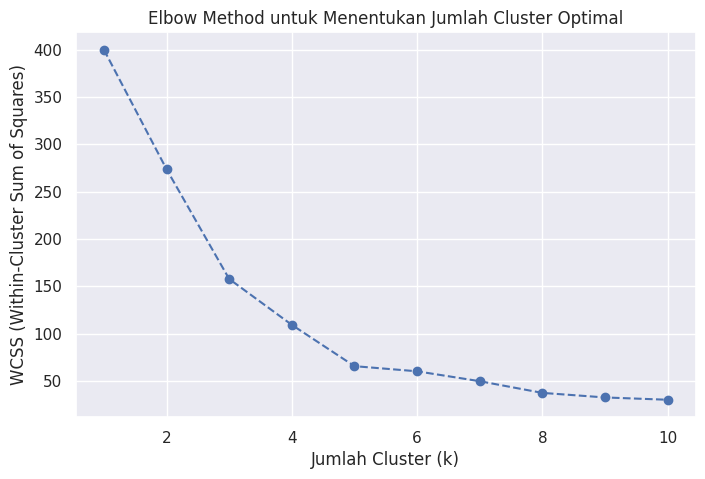

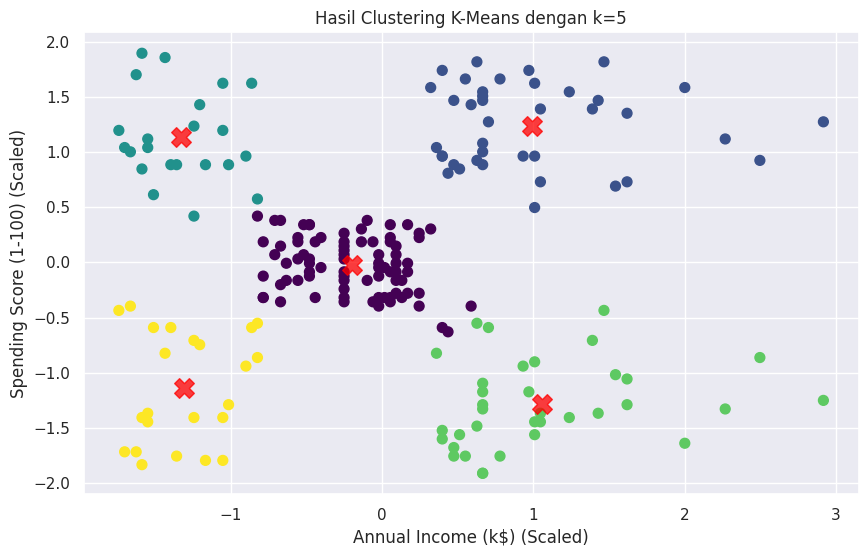


Data dengan Label Cluster (10 baris pertama):
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   
5           6  Female   22                  17                      76   
6           7  Female   35                  18                       6   
7           8  Female   23                  18                      94   
8           9    Male   64                  19                       3   
9          10  Female   30                  19                      72   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  
5        2  
6        4  
7        2  
8        4  
9       

<Figure size 1000x600 with 0 Axes>

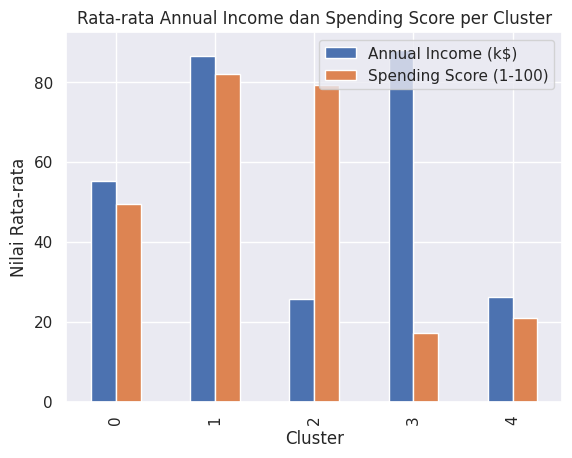

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('Mall_Customers.csv')

# Pilih fitur untuk clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menentukan jumlah cluster optimal menggunakan Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# Pilih jumlah cluster optimal berdasarkan Elbow Method (misalnya k=5)
optimal_k = 5  # Ganti dengan nilai k yang terlihat sebagai "siku" pada grafik
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'Hasil Clustering K-Means dengan k={optimal_k}')
plt.xlabel('Annual Income (k$) (Scaled)')
plt.ylabel('Spending Score (1-100) (Scaled)')
plt.grid(True)
plt.show()

# Tambahkan label cluster ke dataset asli
data['Cluster'] = y_kmeans

# Tampilkan beberapa baris data dengan label cluster
print("\nData dengan Label Cluster (10 baris pertama):")
print(data.head(10))

# Analisis karakteristik setiap cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nRata-rata Fitur per Cluster:")
print(cluster_summary)

# (Opsional) Visualisasi rata-rata fitur per cluster menggunakan bar chart
plt.figure(figsize=(10, 6))
cluster_summary.plot(kind='bar')
plt.title('Rata-rata Annual Income dan Spending Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nilai Rata-rata')
plt.grid(True)
plt.show()


**Tugas DBSCAN**

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving make_moons_dataset.csv to make_moons_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

data = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'y': y})
data.to_csv('make_moons_dataset.csv', index=False)
print("Dataset telah disimpan sebagai 'make_moons_dataset.csv'")

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dataset telah disimpan sebagai 'make_moons_dataset.csv'


In [ ]:
data.head()

,X0,X1,y
0,15,39,0
1,15,81,1
2,16,6,1
3,16,77,0
4,17,40,1


2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Hitung jumlah cluster dan noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("\nHasil DBSCAN (eps=0.2, min_samples=5):")
print(f"Jumlah Cluster: {n_clusters}")
print(f"Jumlah Noise: {n_noise}")


Hasil DBSCAN (eps=0.2, min_samples=5):
Jumlah Cluster: 7
Jumlah Noise: 77


3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [ ]:
# Evaluasi metrik
if n_clusters > 1:
    homogeneity = homogeneity_score(y, labels)
    completeness = completeness_score(y, labels)
    v_measure = v_measure_score(y, labels)
    ari = adjusted_rand_score(y, labels)
    ami = adjusted_mutual_info_score(y, labels)
    silhouette = silhouette_score(X_scaled, labels)
else:
    homogeneity = completeness = v_measure = ari = ami = silhouette = np.nan

print("\nMetrik Evaluasi (eps=0.2, min_samples=5):")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Completeness: {completeness:.4f}")
print(f"V-measure: {v_measure:.4f}")
print(f"ARI: {ari:.4f}")
print(f"AMI: {ami:.4f}")
print(f"Silhouette: {silhouette:.4f}")


Metrik Evaluasi (eps=0.2, min_samples=5):
Homogeneity: 0.0094
Completeness: 0.0045
V-measure: 0.0061
ARI: -0.0052
AMI: -0.0120
Silhouette: 0.1406


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).

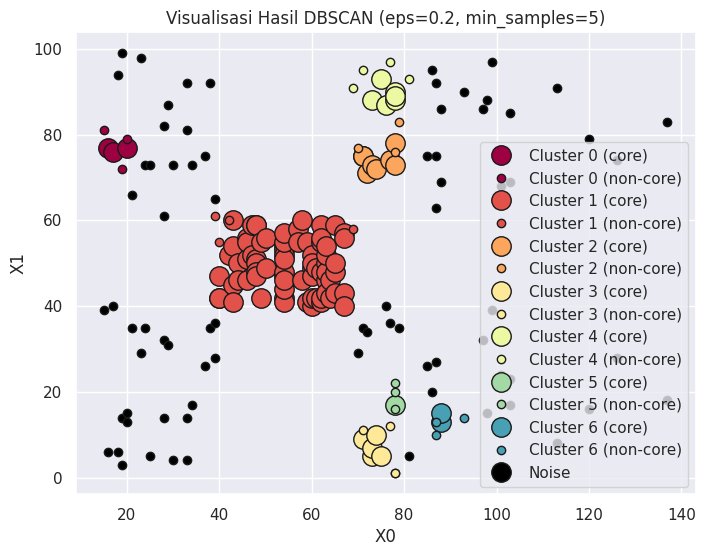

In [ ]:
# Visualisasi hasil DBSCAN
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(labels)

plt.figure(figsize=(8, 6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Noise berwarna hitam
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]  # Core samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14, label=f'Cluster {k} (core)' if k != -1 else 'Noise')
    xy = X[class_member_mask & ~core_samples_mask]  # Non-core samples
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6, label=f'Cluster {k} (non-core)' if k != -1 else None)

plt.title('Visualisasi Hasil DBSCAN (eps=0.2, min_samples=5)')
plt.xlabel('X0')
plt.ylabel('X1')
plt.legend()
plt.grid(True)
plt.show()

5. Lakukan eksperimen:
- eps = 0.05, 0.1, 0.3, 0.5

- min_samples = 3, 10, 20

- Catat perubahan klaster, noise, dan kualitas evaluasi.


Hasil Eksperimen:
 eps  min_samples  n_clusters  n_noise  homogeneity  completeness  v_measure     ari     ami  silhouette
0.05            3           6      179       0.0370        0.0491     0.0422 -0.0007  0.0114     -0.4302
0.05           10           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.05           20           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.10            3          14      121       0.0391        0.0166     0.0234 -0.0047 -0.0135     -0.2031
0.10           10           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.10           20           0      200          NaN           NaN        NaN     NaN     NaN         NaN
0.30            3           9       14       0.0163        0.0063     0.0091 -0.0039 -0.0111      0.4136
0.30           10           4       88       0.0047        0.0027     0.0034 -0.0040 -0.0077      0.1409
0.30           20           1      1

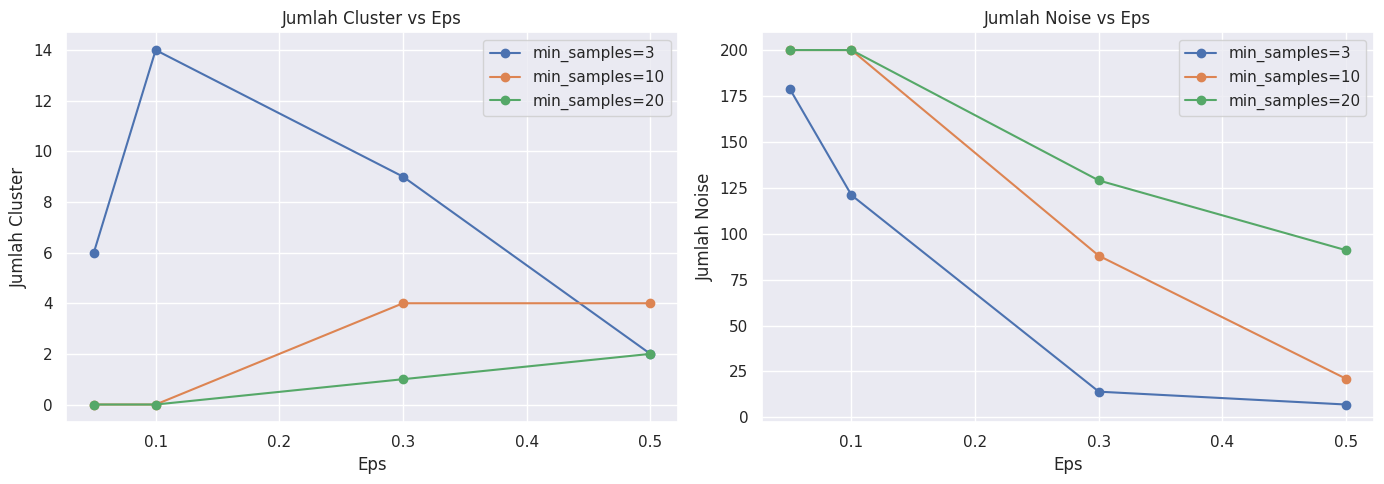

In [ ]:
# Eksperimen dengan variasi eps dan min_samples
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]
results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        if n_clusters > 1:
            homogeneity = homogeneity_score(y, labels)
            completeness = completeness_score(y, labels)
            v_measure = v_measure_score(y, labels)
            ari = adjusted_rand_score(y, labels)
            ami = adjusted_mutual_info_score(y, labels)
            silhouette = silhouette_score(X_scaled, labels)
        else:
            homogeneity = completeness = v_measure = ari = ami = silhouette = np.nan
        results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'homogeneity': homogeneity,
            'completeness': completeness,
            'v_measure': v_measure,
            'ari': ari,
            'ami': ami,
            'silhouette': silhouette
        })

# Tampilkan hasil eksperimen dalam tabel
results_df = pd.DataFrame(results)
print("\nHasil Eksperimen:")
print(results_df.round(4).to_string(index=False))

# Visualisasi hasil eksperimen untuk jumlah cluster dan noise
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
for min_samples in min_samples_values:
    subset = results_df[results_df['min_samples'] == min_samples]
    ax1.plot(subset['eps'], subset['n_clusters'], marker='o', label=f'min_samples={min_samples}')
    ax2.plot(subset['eps'], subset['n_noise'], marker='o', label=f'min_samples={min_samples}')

ax1.set_title('Jumlah Cluster vs Eps')
ax1.set_xlabel('Eps')
ax1.set_ylabel('Jumlah Cluster')
ax1.legend()
ax1.grid(True)

ax2.set_title('Jumlah Noise vs Eps')
ax2.set_xlabel('Eps')
ax2.set_ylabel('Jumlah Noise')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()